In [2]:
from pandas import read_csv
import pandas as pd
from pandas import *
import matplotlib.pyplot as plt
import seaborn as sns
df = read_csv("csv/london.csv")

/home/daniel/miniconda3/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


After importing the data, we need to get rid of the cycles (rows) where the L_PREOV is 0, because this data is unusable. After these rows are dropped, there are holes created in the index of the data frame.

Ex: If row 100 is deleted, then the index would be (...98, 99, 101, 102...)

We would like the index numbers to be consecutive so we must use the `reset_index` function

In [3]:
# Slow method of dropping rows:
"""
i=0
for index, row in df.iterrows():
    if row['L_PREOV'] == 0:
        #print(row)
        df.drop(index, inplace=True)
        i+=1
print(str(i)+" rows dropped")
"""
# Faster method:
df = df[df['L_PREOV']!=0]

#Re-index:
df = df.reset_index(drop=True)



In [4]:
def get_cycle(df, cycle_index):
    d = {}
    for i in range(1, df['L_CICLO'][cycle_index]+1):
        d[i]=df['TEMP'+str(i)][cycle_index]
    dfcycle = DataFrame(list(d.items()), columns=['day', 'BBT'])
    return dfcycle


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29463 entries, 0 to 29462
Columns: 112 entries, DONNA to FIGLI
dtypes: int64(111), object(1)
memory usage: 25.2+ MB


In [6]:
%matplotlib inline

In [7]:
def plot_cycle(df_cycle, cycle_index, l_period, l_preov):
    df_cycle.plot(kind='line', x='day', y='BBT')
    
    plt.axvline(l_period, color='red')
    plt.axvline(l_preov, color='green')
    plt.savefig('figs/' + str(cycle_index) + '.png')  # write image to file.. filename+2=row in csv file
    plt.cla()

In [8]:
# GENERATE THE 36k plots
# num_cycles = len(df.index)
# for x in range(0, num_cycles):
#     cycle_index = x;
#     l_period = df['L_PERIOD'][cycle_index]
#     l_preov = df['L_PREOV'][cycle_index]
#     plot_cycle(get_cycle(df, cycle_index), cycle_index, l_period, l_preov)

In [9]:
df.to_csv("london_sub.csv", sep='\t')

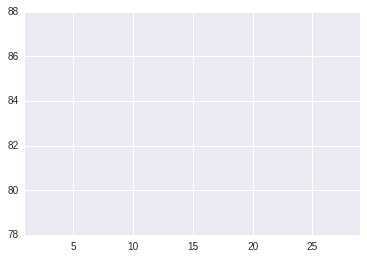

In [11]:
cycle_index = 0
l_period = df['L_PERIOD'][cycle_index]
l_preov = df['L_PREOV'][cycle_index]
    
plot_cycle(get_cycle(df, cycle_index), cycle_index, l_period, l_preov)

In [ ]:
# Generate 10 random plots
from random import randint

for x in range(0, 10):
    
    
    cycle_index = randint(0, len(df) - 1)
    print(cycle_index)
    l_period = df['L_PERIOD'][cycle_index]
    l_preov = df['L_PREOV'][cycle_index]
    
    plot_cycle(get_cycle(df, cycle_index), cycle_index, l_period, l_preov)
    